In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import plotly.figure_factory as ff



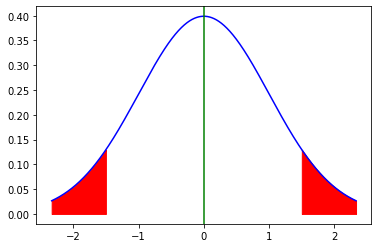

In [18]:
def plot_t_student(df=1000, lb=None, ub=None, type="two-sided", stat_value=0):
    x = np.linspace(scipy.stats.t.ppf(0.01, df), scipy.stats.t.ppf(0.99, df), 1000)
    
    plt.plot(x, scipy.stats.t.pdf(x, df), color = 'blue')


    if type == "two-sided":
        px_lower = np.arange(min(x), lb, 0.01)
        plt.fill_between(px_lower, scipy.stats.t.pdf(px_lower, df), color='red')

        px_upper = np.arange(ub, max(x), 0.01)
        plt.fill_between(px_upper, scipy.stats.t.pdf(px_upper, df), color='red')
    elif type == "left-sided":
        px_lower = np.arange(min(x), lb, 0.01)
        plt.fill_between(px_lower, scipy.stats.t.pdf(px_lower, df), color="red")
    elif type == "right-sided":
        px_upper = np.arange(ub, max(x), 0.01)
        plt.fill_between(px_upper, scipy.stats.t.pdf(px_upper, df), color="red")

    plt.axvline(x=stat_value, color="green")


plot_t_student(lb=-1.5, ub=1.5)

# Porównanie z normą

## Model 1


p-value is lower than 0.05. Null hypothesis has been rejected!


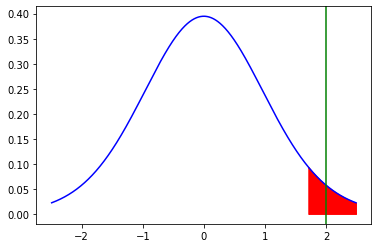

In [21]:
def make_decision(p_value, alpha):
    if p_value <= alpha:
        decision = f"p-value is lower than {alpha}. Null hypothesis has been rejected!"
    else:
        decision = f"p-value is higher than {alpha}. There is not enough evidence to rejest the null hypothesis!"
    return decision


def one_sample_t_test(pop_mean, variance, tested_mean, N, alpha=0.05, type="two-sided"):
    
    test_stat = (pop_mean - tested_mean) * N ** (1/2) / variance ** (1/2)
    dof = N - 1
    ub = 1.96
    lb = -1.96


    if type == "two-sided":
        lb = scipy.stats.t.ppf(alpha/2, dof)
        ub = -scipy.stats.t.ppf(alpha/2, dof)
        p_value = 2 - 2 * scipy.stats.t.cdf(test_stat, dof)
        
    elif type == "left-sided":
        lb = scipy.stats.t.ppf(alpha, dof)
        p_value = scipy.stats.t.cdf(test_stat, dof)

    elif type == "right-sided":
        ub = - scipy.stats.t.ppf(alpha, dof)
        p_value = 1 - scipy.stats.t.cdf(test_stat, dof)

    decision = make_decision(p_value, alpha)

    return {"test_stat":test_stat, "p-value":p_value, "lb":lb, "ub":ub, "degrees_of_freedom":dof, "type":type, "decision":decision}



results = one_sample_t_test(250, 2500, 230, 25, type="right-sided")
plot_t_student(df=results["degrees_of_freedom"], lb=results["lb"], ub=results["ub"], type=results["type"], stat_value=results["test_stat"])
print(results["decision"])
